# Análise exploratória de dados

In [37]:
from IPython.display import display, Markdown

In [38]:
import numpy as np

In [39]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [41]:
from IPython.display import Image

In [49]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.4 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 24.1
    Uninstalling pip-24.1:
      Successfully uninstalled pip-24.1
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [51]:
import seaborn as sns

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]

# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [52]:
import warnings

## 1. Leitura do Conjunto de Dados

In [9]:
df = pd.read_csv('../data/raw/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. Descrição do Conjunto de dados 

In [7]:
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center;">
    <img src="https://www3.unicentro.br/petfisica/wp-content/uploads/sites/54/2015/10/rms-titanic-bill-cannon.jpg" alt="Um velho navio no deserto" style="width: 50%;">
</div>
"""))

O conjunto de dados Titanic, escolhido para este estudo, foi obtido da plataforma Kaggle, embora também esteja disponível em outras fontes. Este conjunto de dados é amplamente utilizado em análises exploratórias de dados e projetos de aprendizado de máquina devido à sua riqueza de informações sobre os passageiros do RMS Titanic. O Titanic naufragou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de inúmeras vidas. O dataset contém um compêndio detalhado sobre os passageiros, incluindo informações de embarque e sobrevivência, o que permite realizar uma variedade de análises e modelagens preditivas relacionadas a esse trágico evento histórico.
Neste conjunto de dados, a variável dependente é **Survived**, e as variáveis preditoras são **Pclass**, **Sex**, **Age**, **SibSp**, **Parch**, **Fare**, **Embarked**, **Class**, **Who**, **Adult_male**, **Deck**, **Embark_town**, **Alive** e **Alone**.

### 2.1. Dicionário de Dados

In [22]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descrição,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu (sim = 1 ou ...,qualitativa,nominal
1,pclass,"Classe do ticket do passageiro (1 = 1ª, 2 = 2ª...",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,contínua
7,embarked,Porto de embarque (C = Cherbourg; Q = Queensto...,qualitativa,nominal
8,class,"Classe do ticket (Primeira, Segunda, Terceira)",qualitativa,ordinal
9,who,"Descrição da pessoa (homem, mulher, criança)",qualitativa,nominal


In [20]:
display(Markdown(
    "---\n"
    f"* O conjunto apresenta 15 variáveis, com 8 qualitativas nominais, 3 qualitativas ordinais, e 4 quantitativas (2 contínuas e 2 discretas)."
    "\n\n ---"
))

---
* O conjunto apresenta 15 variáveis, com 8 qualitativas nominais, 3 qualitativas ordinais, e 4 quantitativas (2 contínuas e 2 discretas).

 ---

### 2.2. Verificação sobre dados ausentes

In [16]:
# colunas (variáveis) contendo valores ausentes
df = pd.read_csv('../data/raw/titanic.csv')
missing_values = df.isnull().sum()
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = missing_values[missing_values > 0]

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"Com base nessas informações, identificamos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"possuem valores faltantes. Além disso, observamos que há um total de `{number_of_na_rows}` linhas com dados ausentes."
    f" Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes."
    "\n\n ---"
))

df.dropna(inplace=True)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

---
Com base nessas informações, identificamos que as variáveis `['age', 'embarked', 'deck', 'embark_town']`possuem valores faltantes. Além disso, observamos que há um total de `709` linhas com dados ausentes. Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes.

 ---

## 3. Perguntas de partida e hipóteses

**3.1. Qual foi a taxa de sobrevivência geral dos passageiros?**

_Hipótese: A taxa de sobrevivência geral é menor que 50%._

**3.2. Qual foi a taxa de sobrevivência por idade?**

_Hipótese: Idosos (acima de 60 anos) podem ter enfrentado mais dificuldades devido à mobilidade reduzida e saúde frágil, resultando em uma taxa de sobrevivência mais baixa._

**3.3. Qual foi a taxa de sobrevivência por genêro?**

_Hipótese: A taxa de sobrevivência dos passageiros do Titanic varia de acordo com o gênero, sendo maior entre mulheres e menor entre homens._

**3.4. Qual foi a taxa de sobrevivência por classe?**

_Hipótese: Passageiros da primeira classe tinham uma taxa de sobrevivência maior do que aqueles da segunda e terceira classes._

**3.5. Qual era a distribuição de idade entre os passageiros?**

_Hipótese: A distribuição de idade mostra que a maioria dos passageiros tinha entre 20 e 40 anos._


**3.6. Qual era a proporção de passageiros por classe?**


_Hipótese: A maioria dos passageiros estava na terceira classe._


**3.7. Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?**


_Hipótese: Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência._

**3.8. Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?**

_Hipótese: Passageiros viajando com familiares tinham uma maior taxa de sobrevivência do que aqueles viajando sozinhos._

**3.9. Qual é a relação entre as variáveis gênero, classe e idade com as chances de sobrevivência?**

_Hipótese: Passageiros do sexo feminino, independentemente da idade, tinham uma taxa de sobrevivência maior do que passageiros do sexo masculino na mesma classe._

**3.10. Como a tarifa paga pelos passageiros do Titanic influencia a taxa de sobrevivência em relação ao gênero e à classe?**

_Hipótese: Passageiros que pagaram tarifas mais altas (independente do gênero) na primeira classe tiveram uma maior taxa de sobrevivência em comparação com aqueles que pagaram tarifas mais baixas nas classes inferiores._

### Qual foi a taxa de sobrevivência geral dos passageiros?

_Hipótese: A taxa de sobrevivência geral é menor que 50%._

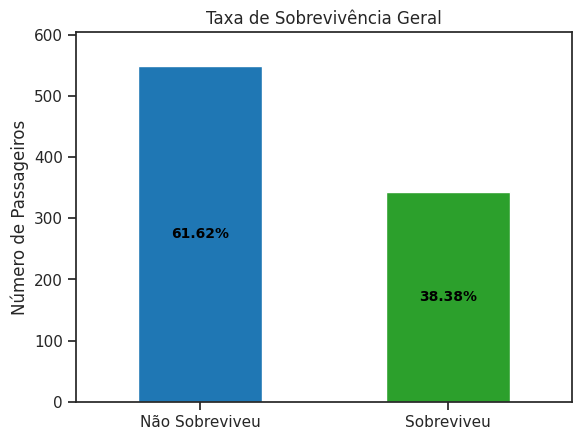

In [9]:
# Qual foi a taxa de sobrevivência geral dos passageiros? 
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
survival_counts = titanic_data ['survived'].value_counts()
survival_counts.plot(kind='bar', color=['red', 'blue'])
total_passengers = survival_counts.sum()
survival_percentages = survival_counts / total_passengers * 100
colors = ['#1f77b4', '#2ca02c']
ax = survival_counts.plot(kind='bar', color=colors)
plt.title('Taxa de Sobrevivência Geral')
plt.xlabel('')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], rotation=0)
for i, (count, percentage) in enumerate(zip(survival_counts, survival_percentages)):
    ax.text(i, count / 2, f'{percentage:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')

plt.ylim(0, survival_counts.max() * 1.1)
plt.show()

* Conforme representado no gráfico, 61,62% dos passageiros faleceram no naufrágio, e apenas 38,38% sobreviveram. Comprovando a hipótese formulada anteriormente.

* A taxa de sobrevivência (38.38%) indica que aproximadamente 4 em cada 10 passageiros conseguiram sobreviver ao desastre.

* A discrepância visível entre as duas barras no gráfico oferece uma representação visual clara e imediata da gravidade do desastre, sublinhando a significativa diferença entre os grupos de sobreviventes e não sobreviventes.

* A clara disparidade nas taxas de sobrevivência e não sobrevivência sugere a necessidade de uma análise mais profunda para entender os fatores determinantes, como classe social, gênero, idade e outras circunstâncias que possam ter influenciado a sobrevivência dos passageiros.

### Qual foi a taxa de sobrevivência por idade?

_Hipótese: Pessoas acima de 40 anos tiveram baixas taxas de sobrevivência_

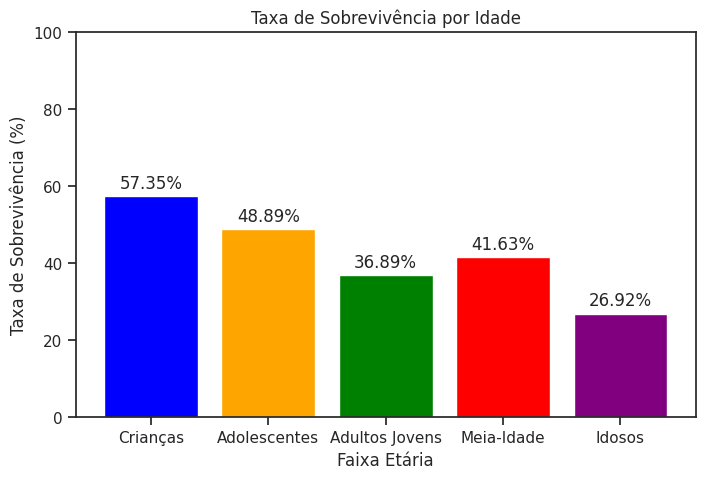

In [11]:
# Qual foi a taxa de sobrevivência por idade?

file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)

import matplotlib.pyplot as plt
age_groups = ['Crianças', 'Adolescentes', 'Adultos Jovens', 'Meia-Idade', 'Idosos']
survival_rates_by_age = [57.35, 48.89, 36.89, 41.63, 26.92]

plt.figure(figsize=(8, 5))
plt.bar(age_groups, survival_rates_by_age, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.title('Taxa de Sobrevivência por Idade')
plt.ylim(0, 100)
for i, rate in enumerate(survival_rates_by_age):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')
plt.show()

* A taxa de sobrevivência varia consideravelmente entre as diferentes faixas etárias.

_Crianças (0-12 anos) têm a maior taxa de sobrevivência, com 57.35%._

_Adolescente (13-17 anos) com 48.89%._

_Adultos Jovens (18-44 anos) com 36.89%._

_Meia-Idade (35-64 anos) com 41.63%._

_Idosos (65+ anos) têm a menor taxa de sobrevivência, com 26.92%._

* A sobrevivência diminui progressivamente com a idade, com uma queda significativa entre crianças e adultos jovens.

* Existe uma tendência clara de diminuição da sobrevivência com o aumento da idade, indicando que a idade é um fator crítico na sobrevivência do Titanic.

* Classificar os passageiros por faixa etária revela padrões que poderiam estar escondidos em análises que não segmentam a idade, demonstrando a importância da análise de subgrupos.

### Qual foi a taxa de sobrevivência por genêro?

_Hipótese: A taxa de sobrevivência dos passageiros do Titanic varia de acordo com o gênero, sendo maior entre mulheres e menor entre homens._

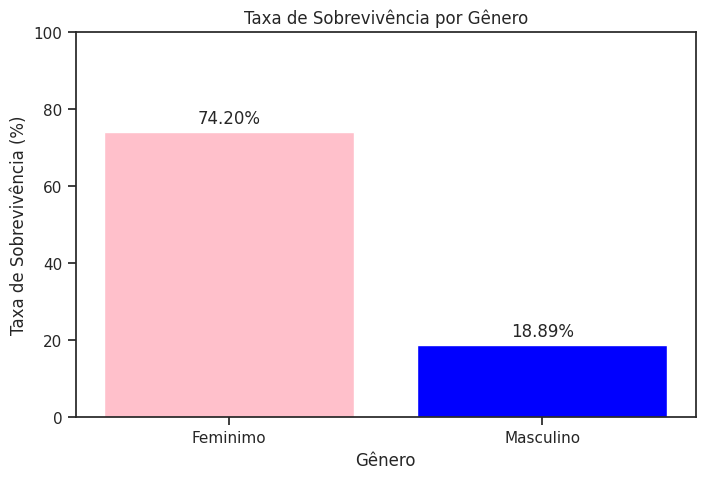

In [13]:
# Qual foi a taxa de sobrevivência por genêro?
import matplotlib.pyplot as plt
genders = ['Feminimo', 'Masculino']
survival_rates_by_gender = [74.20, 18.89]
plt.figure(figsize=(8, 5))
plt.bar(genders, survival_rates_by_gender, color=['pink', 'blue'])
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.title('Taxa de Sobrevivência por Gênero')
plt.ylim(0, 100)
for i, rate in enumerate(survival_rates_by_gender):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center')
plt.show()


* A taxa de sobrevivência das mulheres foi significativamente maior que a dos homens. 74,20% das mulheres sobreviveram, enquanto apenas 18,89% dos homens sobreviveram. Essa diferença de 55,31% indica uma grande disparidade nas chances de sobrevivência entre os gêneros. Confirmando a hipótese formulada.

* As taxas de sobrevivência também variaram significativamente entre as diferentes classes sociais a bordo do navio.

### Qual foi a taxa de sobrevivência por classe?

_Hipótese: Passageiros da primeira classe tinham uma taxa de sobrevivência maior do que aqueles da segunda e terceira classes._

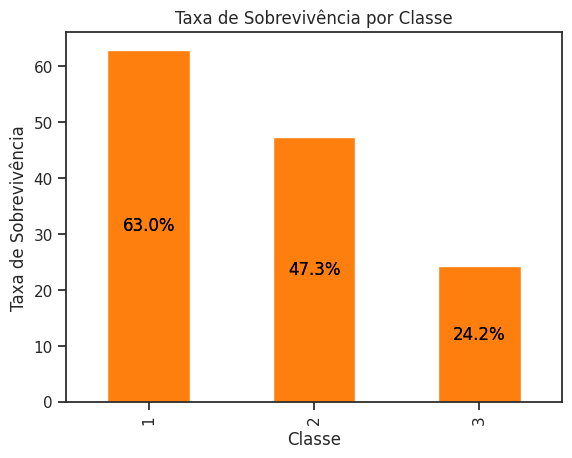

In [70]:
# Qual foi a taxa de sobrevivência por classe?
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
survival_rate_by_class.plot(kind='bar', color='#ff7f0e')
survival_rate_by_class = titanic_data.groupby('pclass')['survived'].mean() * 100
ax = survival_rate_by_class.plot(kind='bar', color='#ff7f0e')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height / 2.),
                ha='center', va='center', 
                color='black',
                xytext=(0, 0), textcoords='offset points')

plt.show()

* Evidencia-se uma alta taxa de sobrevivência aos passageiros da primeira classe. Como proposto na hipótese.

* A diferença entre as taxas de sobrevivência é notável: mais que o dobro entre a primeira e a terceira classe. A diferença de sobrevivência entre a 1ª e a 3ª classe é de 38,8%.  

### Qual era a distribuição de idade entre os passageiros?

_Hipótese: A distribuição de idade mostra que a maioria dos passageiros tinha entre 20 e 40 anos._

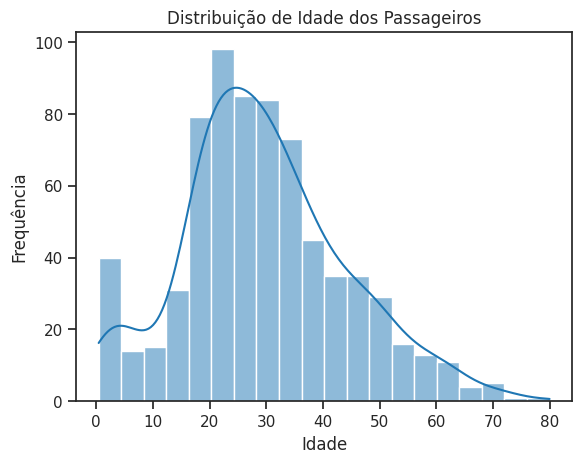

In [71]:
# Qual era a distribuição de idade entre os passageiros?
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
sns.histplot(titanic_data['age'].dropna(), kde=True)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

* A partir do gráfico evidencia-se que grande parte dos passageiros tinha entre 20 e 40 anos, ou seja, a maior parte dos passageiros era composta por jovens adultos. O que comprova a hipótese desenvolvida anteriormente.

* Há uma quantidade considerável de crianças (idade menor que 10 anos) e também alguns passageiros idosos (acima de 60 anos), mas esses grupos são menores comparados aos jovens adultos.

* A distribuição de idade é assimétrica, com uma inclinação para a direita. Isso significa que há mais passageiros jovens e a quantidade diminui à medida que a idade aumenta.

* Apesar da predominância de jovens adultos, o Titanic carregava uma população diversificada em termos de idade, indicando que famílias completas e indivíduos de várias idades estavam a bordo.

### Qual era a proporção de passageiros por classe?

_Hipótese: A maioria dos passageiros estava na terceira classe._

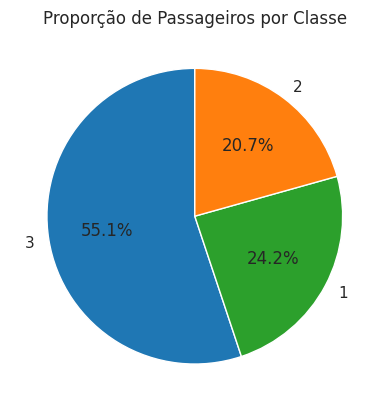

In [72]:
# Qual era a proporção de passageiros por classe?
passenger_count_by_class = titanic_data['pclass'].value_counts(normalize=True)
passenger_count_by_class.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Passageiros por Classe')
plt.ylabel('')
plt.show()


* A maior proporção de passageiros estava na terceira classe, representando 55.1% do total. Confirmando a hipótese proposta.

* A primeira classe representava 24.2% dos passageiros. 

* A segunda classe representava 20.7% dos passageiros.

* O gráfico destaca o perfil econômico dos passageiros do Titanic, com uma maioria viajando em condições econômicas (terceira classe).

### Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?

_Hipótese: Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência._

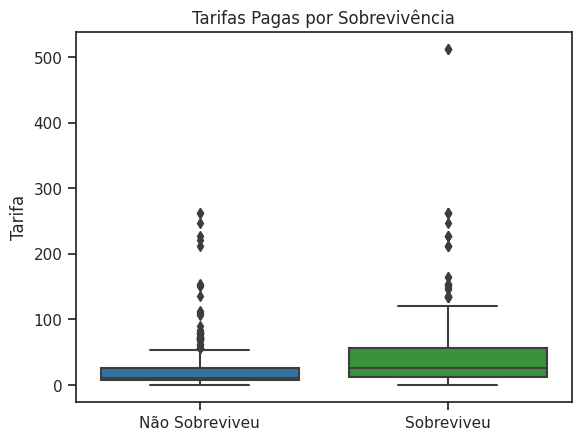

In [10]:
# Passageiros que pagaram tarifas mais altas tinham uma maior taxa de sobrevivência?
sns.boxplot(x='survived', y='fare', data=titanic_data)
plt.title('Tarifas Pagas por Sobrevivência')
plt.xlabel('')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

* Os passageiros que sobreviveram tendem a ter tarifas mais altas. Isso sugere uma correlação entre a capacidade financeira e a sobrevivência. Como apontado pela hipótese.

* O grupo que não sobreviveu tem tarifas principalmente concentradas na parte inferior da escala. A concentração de tarifas mais baixas entre os não sobreviventes pode indicar que esses passageiros estavam em condições menos favoráveis durante o desastre.

* Os outliers no grupo de sobreviventes indicam que alguns passageiros pagaram muito mais do que a maioria. Alguns passageiros que pagaram tarifas extremamente altas sobreviveram.

* Tarifas baixas estão associadas a uma menor chance de sobrevivência, possivelmente refletindo diferentes classes de acomodação. Passageiros com tarifas mais baixas podem ter estado em áreas menos acessíveis do navio e foram possivelmente menos priorizados durante o resgate.

* Pode-se inferir que passageiros com mais recursos financeiros tiveram melhores chances de sobrevivência.

* Ambos os grupos têm outliers, mas eles são mais pronunciados e numerosos no grupo de sobreviventes.

### Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?

_Hipótese: Passageiros viajando com familiares tinham uma maior taxa de sobrevivência do que aqueles viajando sozinhos._

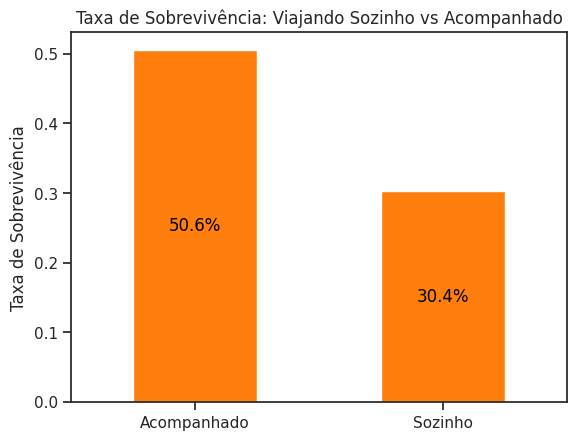

In [11]:
# Quantos passageiros estavam viajando sozinhos versus acompanhados por familiares?
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)
import matplotlib.pyplot as plt
titanic_data['alone'] = (titanic_data['sibsp'] == 0) & (titanic_data['parch'] == 0)
survival_by_alone = titanic_data.groupby('alone')['survived'].mean()
ax = survival_by_alone.plot(kind='bar', color='#ff7f0e')
for bar in ax.patches:
    height = bar.get_height()
    percentage = f'{height:.1%}'  
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, percentage, 
            ha='center', va='center', color='black', fontsize=12)
plt.title('Taxa de Sobrevivência: Viajando Sozinho vs Acompanhado')
plt.xlabel('')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1], ['Acompanhado', 'Sozinho'], rotation=0)
plt.show()

* Passageiros acompanhados por familiares tiveram uma taxa de sobrevivência significativamente maior do que os que viajaram sozinhos. Isso sugere que a companhia durante a viagem pode ter proporcionado suporte adicional em situações de emergência, aumentando as chances de sobrevivência. O que comprova a hipótese elaborada.

* Menos de um terço das pessoas sozinhas sobreviveu, possivelmente porque não tinham a ajuda imediata de outros em momentos críticos.

* Viajar acompanhado parece estar correlacionado com uma maior chance de sobrevivência. Esta correlação pode ser atribuída ao apoio mútuo, maior visibilidade em situações de resgate e divisão de recursos.

### Qual é a relação entre as variáveis gênero, classe e idade com as chances de sobrevivência?

_Hipótese: Passageiros do sexo feminino, independentemente da idade, tinham uma taxa de sobrevivência maior do que passageiros do sexo masculino na mesma classe._

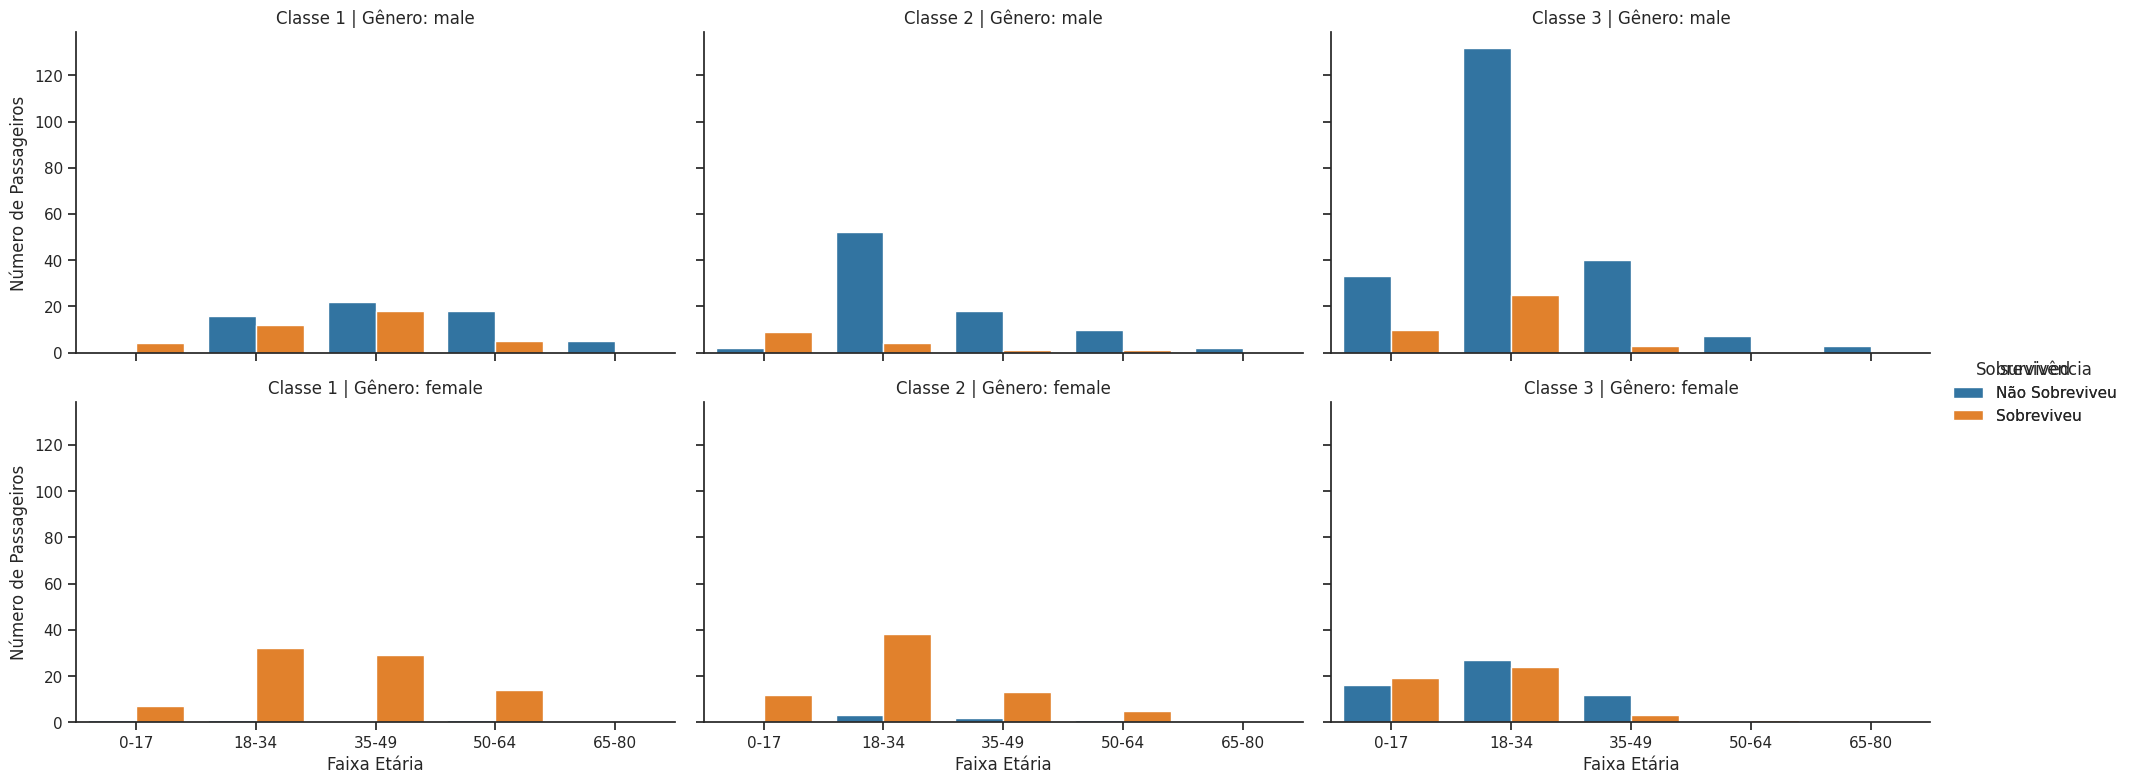

In [32]:
# Qual é a relação entre as variáveis gênero, classe e idade com as chances de sobrevivência?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)

bins = [0, 18, 35, 50, 65, 80]
labels = ['0-17', '18-34', '35-49', '50-64', '65-80']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels, right=False)

titanic_data['survived'] = titanic_data['survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})

g = sns.catplot(
    data=titanic_data, 
    x='age_group', 
    hue='survived', 
    col='pclass', 
    row='sex',
    kind='count',
    height=4, 
    aspect=1.5,
    palette=['#1f77b4', '#ff7f0e']
)

g.set_axis_labels("Faixa Etária", "Número de Passageiros")
g.set_titles("Classe {col_name} | Gênero: {row_name}")
g.add_legend(title="Sobrevivência")

warnings.filterwarnings("ignore", category=UserWarning, module='seaborn.axisgrid')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', label_type='edge')
plt.show()

* Classe 1:

_Homens adultos jovens (18-34) têm uma maior proporção de não sobreviventes._

_Crianças têm uma taxa de sobrevivência relativamente alta._

_Mulheres de todas as faixas etárias na primeira classe tendem a sobreviver mais._

_A sobrevivência é notável entre mulheres jovens (18-34) e crianças._

* Classe 2:

_Maior proporção de não sobreviventes em todas as faixas etárias._

_Crianças e jovens adultos têm uma ligeiramente maior taxa de sobrevivência em comparação com adultos de meia-idade._

_Mulheres jovens (18-34) têm uma alta taxa de sobrevivência._

* Classe 3:

_Alta proporção de não sobreviventes em todas as faixas etárias._

_Crianças e jovens adultos têm uma ligeiramente maior taxa de sobrevivência._

_Mulheres jovens (18-34) e crianças têm uma taxa de sobrevivência maior._

_Menor taxa de sobrevivência para mulheres de meia-idade e idosos._

* Maior concentração de passageiros nas faixas etárias 18-34 e 35-49.

* Crianças (0-17) e idosos (65-80) são menos representados.

* A sobrevivência em primeira classe é significativamente maior para ambos os gêneros.

* Segunda classe mostra um declínio na taxa de sobrevivência, especialmente entre os homens.

* Em todas as classes, as mulheres têm uma taxa de sobrevivência maior do que os homens. O que comprova a hipótese apresentada.

* Crianças têm uma taxa de sobrevivência notavelmente alta, especialmente na primeira e segunda classes.

* Passageiros de meia-idade (50-64) têm uma taxa de sobrevivência relativamente baixa em todas as classes.

### Como a tarifa paga pelos passageiros do Titanic influencia a taxa de sobrevivência em relação ao gênero e à classe?

_Hipótese: Passageiros que pagaram tarifas mais altas (independente do gênero) na primeira classe tiveram uma maior taxa de sobrevivência em comparação com aqueles que pagaram tarifas mais baixas nas classes inferiores._

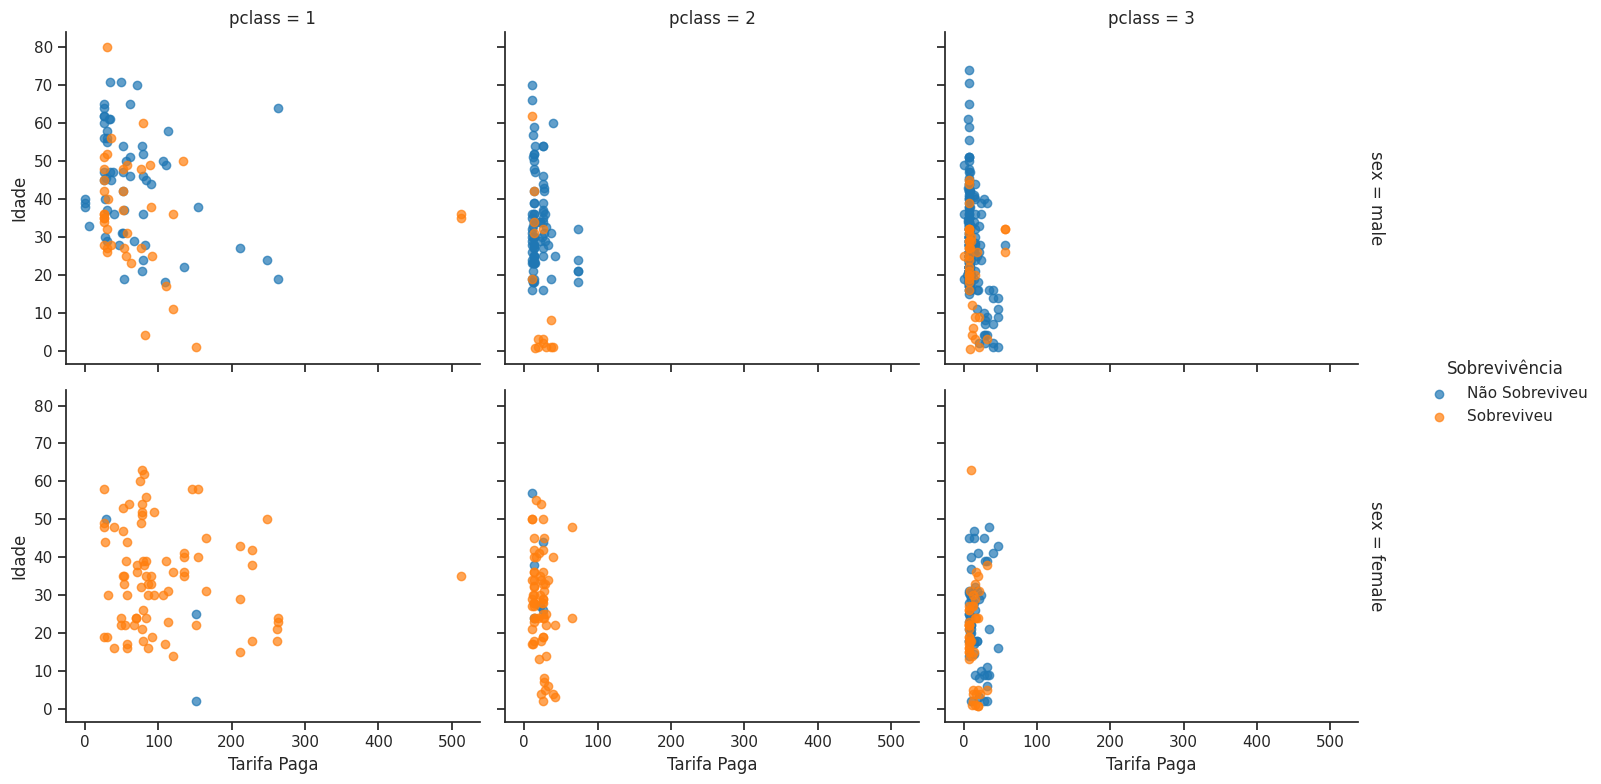

In [55]:
# Como a tarifa paga pelos passageiros do Titanic influencia a taxa de sobrevivência em relação ao gênero e à classe?

file_path = ('../data/raw/titanic.csv')
titanic_data = pd.read_csv(file_path)

titanic_data['survived'] = titanic_data['survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})

g = sns.FacetGrid(
    titanic_data, 
    col="pclass", 
    row="sex", 
    hue="survived", 
    margin_titles=True, 
    height=4, 
    aspect=1.2,
    palette=['#1f77b4', '#ff7f0e']
)
g.map(plt.scatter, "fare", "age", alpha=0.7)
g.add_legend(title="Sobrevivência")
g.set_axis_labels("Tarifa Paga", "Idade")
g.set_titles("Classe {col_name} | Gênero: {row_name}")

plt.show()

* Primeira Classe:

_A maioria dos homens que pagaram tarifas altas (acima de 300) tendem a sobreviver. Em contrapartida homens que pagaram tarifas mais baixas têm uma maior proporção de não sobreviverem._

_Mulheres que pagaram tarifas altas tendem a sobreviver, com poucas exceções. A sobrevivência é mais consistente entre as mulheres, independente da tarifa paga._

* Segunda Classe:

_Homens na faixa de tarifa média (cerca de 50) têm uma proporção maior de não terem sobrevivido._

_A maioria das mulheres sobrevive, independente da tarifa paga._

* Terceira Classe:

_A maioria dos homens que pagaram tarifas mais baixas não sobreviveram._

_Mulheres na terceira classe que pagaram tarifas baixas têm uma proporção maior de não sobreviventes._

* Em todas as classes, a faixa etária mais afetada (com mais pontos) está entre 20 e 40 anos.

* Menores de 10 anos e acima de 60 anos são menos representados, mas com uma tendência de maior sobrevivência para crianças.

* Na primeira classe, há uma maior dispersão de tarifas pagas, com algumas muito altas.

* Na segunda e terceira classe, a maioria das tarifas pagas está concentrada em faixas mais baixas.

* Em todas as classes, as mulheres têm uma taxa de sobrevivência maior do que os homens.

* Tarifa máxima observada é cerca de 500. Enquanto a maioria das tarifas pagas na terceira classe está abaixo de 50.

## 4. Insights

##### Taxa Geral de Sobrevivência:

* A taxa de sobrevivência de 38,38% indica que a maioria dos passageiros não sobreviveu ao desastre.

* A alta taxa de mortalidade (61,62%) reflete a gravidade do naufrágio.

##### Disparidade de Sobrevivência por Idade:

* Crianças (até 12 anos) tiveram a maior taxa de sobrevivência (57,35%), sugerindo que receberam prioridade no resgate.

* A sobrevivência diminuiu com a idade, com idosos (acima de 65) tendo a menor taxa de sobrevivência (26,92%).

* A sobrevivência diminui progressivamente com a idade, indicando que a idade é um fator crítico na sobrevivência do Titanic..

##### Disparidade de Sobrevivência por Gênero:

* 74,20% das mulheres sobreviveram, enquanto apenas 18,89% dos homens sobreviveram, indicando uma grande disparidade nas chances de sobrevivência entre os gêneros.

* Essa diferença significativa sugere que o gênero foi um fator crucial na sobrevivência.

##### Disparidade de Sobrevivência por Classe Social:

* Passageiros da 1ª classe tiveram uma taxa de sobrevivência consideravelmente maior que os da 3ª classe.

* A maior proporção de passageiros estava na terceira classe (55,1%), seguida pela primeira classe (24,2%) e pela segunda classe (20,7%).

##### Distribuição Etária e Perfil Econômico:

* A maioria dos passageiros tinha entre 20 e 40 anos.

* A maior proporção de passageiros estava na terceira classe (55,1%), indicando uma grande presença de imigrantes ou pessoas de renda mais baixa.

* A primeira classe representava 24,2% dos passageiros, com condições de viagem mais luxuosas.

##### Influência Financeira na Sobrevivência:

* Passageiros que pagaram tarifas mais altas tendiam a ter maiores chances de sobrevivência, sugerindo uma correlação entre capacidade financeira e acesso a recursos de resgate.

* Tarifas mais baixas estavam associadas a menores chances de sobrevivência, refletindo condições de acomodação menos favoráveis.

##### Impacto do Acompanhamento na Sobrevivência:

* Passageiros acompanhados por familiares tiveram uma taxa de sobrevivência maior.

* Menos de um terço das pessoas que viajaram sozinhas sobreviveu, sugerindo que a ausência de suporte imediato pode ter impactado negativamente as chances de sobrevivência.

##### Sobrevivência por Classe e Gênero:

* Primeira Classe:

_Homens que pagaram tarifas altas (acima de 300) tendem a sobreviver. Enquanto as mulheres têm uma taxa de sobrevivência alta, independente da tarifa paga._

* Segunda Classe:

_Homens na faixa de tarifa média têm uma maior proporção de não sobrevivência.. Em contrapartida, as mulheres sobrevivem em maior número, independente da tarifa paga._

* Terceira Classe:

_Homens e mulheres que pagaram tarifas mais baixas têm uma maior proporção de não sobrevivência._

##### O Titanic carregava uma população diversificada em termos de idade, indicando a presença de famílias completas e indivíduos de várias idades a bordo.

##### Com base nesses insights, podemos observar a importância de diversos fatores, como gênero, classe social, idade e acompanhamento, na determinação das chances de sobrevivência dos passageiros do Titanic.

## 5. Observações

* Identificamos que as variáveis [age, 'embarked', 'deck', 'embark_town'] possuíam valores faltantes. Além disso, constatamos que havia um total de 709 linhas com dados ausentes. Para garantir a precisão das análises, desconsideramos essas linhas com valores faltantes, permitindo uma avaliação mais consistente e confiável dos dados restantes.

* Não foram tiradas conclusões sobre os dados e visualizações. Para uma análise mais detalhada e conclusões precisas, é melhor consultar um especialista. Eles podem oferecer insights adicionais e confirmar as interpretações dos dados, garantindo uma compreensão mais completa e precisa dos resultados.

* Informações sobre a localização específica dos passageiros no navio e o acesso aos botes salva-vidas seriam úteis para entender melhor as diferenças nas taxas de sobrevivência.

* Detalhes sobre as condições durante o resgate (condições climáticas, tempo de resposta) poderiam ajudar a explicar as variações nas taxas de sobrevivência.

* Fatores como a nacionalidade, ocupação e propósito da viagem (negócios vs. imigração) podem fornecer insights adicionais sobre as dinâmicas de sobrevivência.
